Salvat: orth_proj.gif


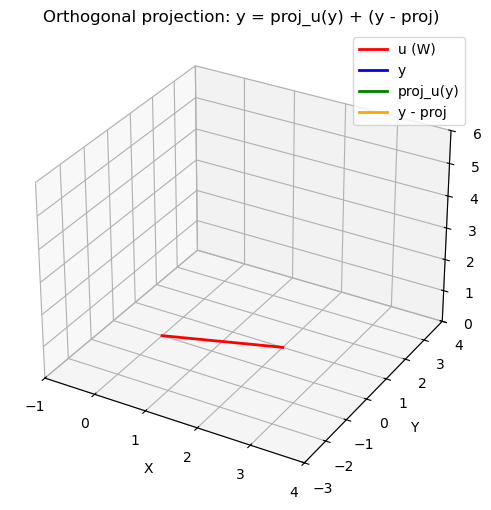

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# --- datele noastre ---
u = np.array([2, 1, 0])
y = np.array([3, 2, 5])
proj = (y @ u) / (u @ u) * u

# pregătim figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim(-1, 4); ax.set_ylim(-3, 4); ax.set_zlim(0, 6)
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title("Orthogonal projection: y = proj_u(y) + (y - proj)")

# desenăm linii (le vom ACTUALIZA, nu recrea)
line_u,     = ax.plot([0, u[0]],     [0, u[1]],     [0, u[2]],     'r', lw=2, label="u (W)")
line_y,     = ax.plot([0, 0],        [0, 0],        [0, 0],        'b', lw=2, label="y")
line_proj,  = ax.plot([0, 0],        [0, 0],        [0, 0],        'g', lw=2, label="proj_u(y)")
line_orth,  = ax.plot([0, 0],        [0, 0],        [0, 0],        'orange', lw=2, label="y - proj")
ax.legend()

def set_line(line, vec):
    line.set_data([0, vec[0]], [0, vec[1]])
    line.set_3d_properties([0, vec[2]])

def init():
    set_line(line_y,    np.zeros(3))
    set_line(line_proj, np.zeros(3))
    set_line(line_orth, np.zeros(3))
    return (line_y, line_proj, line_orth)

def update(frame):
    t = frame / 30  # 0..1
    y_t    = t * y
    proj_t = t * proj
    orth_t = y_t - proj_t

    set_line(line_y,    y_t)
    set_line(line_proj, proj_t)
    set_line(line_orth, orth_t)
    return (line_y, line_proj, line_orth)

ani = FuncAnimation(fig, update, frames=31, init_func=init, blit=False)

# ATENȚIE: nu închide figura înainte de save!
ani.save("orth_proj.gif", writer=PillowWriter(fps=12))
print("Salvat: orth_proj.gif")
